### Notebook 4 - Autoencoders

An **autoencoder** is a machine-learning algorithm that is trained to copy its input (or some corrupted version thereof) to its output. The hidden layers, which describe the **latent representation** of the input data, typically have a lower dimensionality than the input and output.

In this section we look at two applications of autoencoders. 
* Removing noise from images  
* Compression of data

In [1]:
# We now load the libraries that are required.
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

from keras.datasets import mnist


Using TensorFlow backend.


* Load the data set, reshape and assign to variables

In [2]:
# Load the MNIST data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize data
x_trainR = x_train.astype('float32') / 255.
x_testR = x_test.astype('float32') / 255.

x_trainV=x_trainR.reshape(60000,784)
x_testV=x_testR.reshape(10000,784)

### Plot images of the first 5 numbers

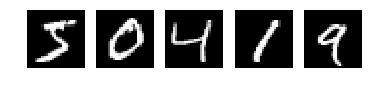

In [4]:
for n in range(5):
    plt.subplot(1,5,n+1)
    plt.imshow(x_trainR[n,:,:],cmap='gray');
    plt.axis("off")
    

---

For Q1-Q3 we will be teaching a network to remove noise from data. The method will be to create a network that takes in noisy images and has the original image as a target output. We can then evaluate how good the network is at removing noise from images it has not seen before (using the test set).

### Q1. Create a new data set of noisy images.

* Create two new training and test data sets that have gaussian noise of standard deviation $\sigma$ added to them. These sets should be the same size as the original sets (don't overwrite them).
* Make sure that the pixel entries are between 0 and 1 still. The command np.clip(M,0,1) will be of use
* Plot the first 5 original and noisy versions as two rows.


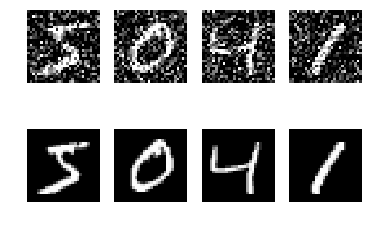

In [5]:
sigma = 0.4

x_train_noise=x_trainV + sigma*np.random.randn(60000, 784)
x_testN = x_testV + sigma * np.random.randn(10000, 784)

x_train_noise = np.clip(x_train_noise, 0, 1)
x_testN = np.clip(x_testN, 0,1)

for k in range(4):
    plt.subplot(2, 4, k+1)
    plt.imshow(x_train_noise[k, :].reshape(28, 28), cmap = 'gray')
    plt.axis("off")
    
    plt.subplot(2, 4, k+1+4)
    plt.imshow(x_trainV[k,:].reshape(28, 28), cmap = 'gray')
    plt.axis("off")

### Q2. Building the neural network
* Construct a neural network model that takes in the images, has one or more hidden layers and outputs a vector the same size as the input with a sigmoid activation.
* Use the summary command to check the shape of the model.
* Compile the model, but this time use a mean-squared error (i.e. loss='mse') as the cost function.
* Fit the model using the noisy training data as an input and the clean training data as an output.

In [6]:
# Initilise a sequential model
mod = Sequential()

# The activation is relu which means rectified linear
mod.add(Dense(84, input_dim=784,activation='relu'))

# The next layer is the output layer
mod.add(Dense(784,activation='relu'))

mod.summary()

p = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

mod.compile(optimizer= p,loss='mse',metrics=['accuracy'])

mod.fit(x_train_noise, x_trainV,batch_size=128,epochs=5)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               66640     
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 0.0372 - acc: 0.0098     
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.0242 - acc: 0.0115     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0220 - acc: 0.0116     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0208 - acc: 0.0127     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0202 - acc: 0.0126     


### Q3. Evaluating the performance of the model
* Generate the output of the model using the noisy **test** data.
* For some example data sets plot the noisy input image, the denoised image as well as the original clean image to evaluate the denoiser you have constructed.
* If you have time: create another set of data with a different level of noise. How well does your first network denoise the data when the strength of the noise is changed? 

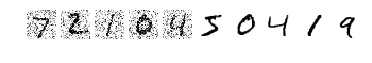

In [7]:
P=mod.predict(x_testN)
N=np.argmax(P[:,:],1)
ne=5
for k in range(ne):
    plt.subplot(1,2*ne,k + 1)
    plt.imshow(x_testN[k, :].reshape(28, 28),cmap=plt.cm.gray_r)
    plt.axis("off")
    
    plt.subplot(1,2*ne,k+6)
    plt.imshow(x_trainV[k, :].reshape(28, 28),cmap=plt.cm.gray_r)
    plt.axis("off")

---

### Q4 Compressing data with autoencoders
We now go back to using the original images and seek to build a network that can compress the data. This is achieved by having an input and output layer the same size, but an intermediate layer that is much smaller (in this case two neurons) potentially sandwiched between additional hidden layers.
* Define a model that has three hidden layers, with the middle hidden layer having two neurons. You can choose the size of the first and third hidden layers.
* Train the network so that the target of the network is the same as the input.
* It will make sense to use the loss='mse' cost function again.
* Get the predictions from the model using the test data and compare the output to the input for a range of numbers.

In [8]:
# Initilise a sequential model
mod = Sequential()
# The activation is relu which means rectified linear
mod.add(Dense(84, input_dim=784,activation='relu'))
# The next layer is the output layer
mod.add(Dense(2,activation='relu'))
# The next layer is the output layer
mod.add(Dense(784,activation='softmax'))
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 170       
_________________________________________________________________
dense_5 (Dense)              (None, 784)               2352      
Total params: 68,462
Trainable params: 68,462
Non-trainable params: 0
_________________________________________________________________


In [10]:

x_trainV=x_trainR.reshape(60000,784)
x_testV=x_testR.reshape(10000,784)

rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

mod.compile(optimizer= rms,loss='mse',metrics=['accuracy'])
mod.fit(x_trainV, x_trainV, batch_size=128,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.1108 - acc: 0.0087     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.1105 - acc: 0.0089     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 0.1104 - acc: 0.0115     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.1104 - acc: 0.0136     
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 0.1103 - acc: 0.0148     


### Q5 Investigating the hidden layers.
We would like to get information on what the states are of the hidden layers. The way we do this in Keras is to build two half networks. One that goes down to the middle layer and one that goes from the middle layer to the outer layer. We can call these two models halfinmodel and halfoutmodel. We can copy the weights from the original network into the half networks using the commands weights=model.layers[0].get_weights(), for example

halfinmodel.add(Dense(128, input_dim=784,activation='relu',weights=model.layers[0].get_weights()))

* Build the half in and half out models.

In [ ]:
mod = Sequential()
halfinmodel.add(Dense(128, input_dim=784,activation='relu',weights=model.layers[0].get_weights()))

### Q6 The middle layer as points on the x-y plane.
* Extract the activiations in the middle layer using the prediction function on the half in model with the training data as input.
* Plot the data on the x-y plane, colour-coded by number. Note: it is easier to visualise if you plot the data on a log scale and do two graphs, one with 0-4 and another with 5-9.

### Q7. Finally, for "fun"...
* Pick coordinates from the x-y plane, perhaps where there are none of the data, and run them through the half-out model to create "new" digits that are neither one number or another.